In [108]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
import numpy as np
np.random.seed(888)
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Reshape,Dropout,Activation
from keras.layers.advanced_activations import LeakyReLU,PReLU
# from keras.callbacks import EarlyStopping
# earlyStopping=EarlyStopping(monitor='val_loss',patience =3)
from keras.regularizers import l1,l2
from keras.constraints import nonneg

%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime
from sklearn import cluster, datasets, metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing

Train Score: 21.67 RMSE
Test Score: 48.33 RMSE


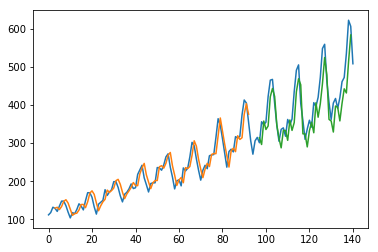

-317.314378023 seconds


In [125]:
import time
start = time.time()

# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv',sep=';', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# # normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# new zero mean
# dataset = preprocessing.scale(dataset)




# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network



model = Sequential()  
model.add(LSTM(20, input_shape=(look_back,1), return_sequences=True))  
model.add(Activation('linear'))
model.add(Dropout(0.25)) 
model.add(LSTM(10, return_sequences=False))  
model.add(Activation('linear'))
model.add(Dropout(0.25))   
model.add(Dense(1))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="adam")  
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)



# model = Sequential()
# model.add(LSTM(20,batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
# model.add(Activation('linear'))
# model.add(Dropout(0.25))
# model.add(LSTM(10,batch_input_shape=(1, look_back, 1), stateful=True))
# model.add(Activation('linear'))
# model.add(Dropout(0.25))
# model.add(Dense(1))
# model.add(Activation('linear'))
# model.compile(loss='mean_squared_error', optimizer='adam')
# for i in range(100):
#     model.fit(trainX, trainY, nb_epoch=1, batch_size=1, verbose=0, shuffle=False)
#     model.reset_states()


# # make predictions
# trainPredict = model.predict(trainX, batch_size=1)
# model.reset_states()
# testPredict = model.predict(testX, batch_size=1)


# make predictions
trainPredict = model.predict(trainX)

testPredict = model.predict(testX)



# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print(start - time.time()),'seconds'

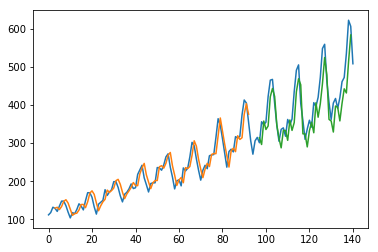

In [128]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('../plane.png')